In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

In [2]:
%matplotlib inline

In [3]:
import zipfile

In [4]:
zipfile.ZipFile('names.zip').extractall('.')

In [5]:
open('yob1880.txt', 'r').readlines()[:5]

['Mary,F,7065\n',
 'Anna,F,2604\n',
 'Emma,F,2003\n',
 'Elizabeth,F,1939\n',
 'Minnie,F,1746\n']

In [6]:
all_years = []

for year in range(1880, 2020):
    all_years.append(pd.read_csv('yob{}.txt'.format(year), names =['Name', 'Sex', 'Babies']))
    all_years[-1]['Year'] = year
    
us_names = pd.concat(all_years)

In [7]:
us_names.isnull().any()

Name      False
Sex       False
Babies    False
Year      False
dtype: bool

In [8]:
group_names = us_names.groupby(['Sex', 'Year'])

In [9]:
group_names.size().unstack()

Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Sex,,,,,,,,,,,,,,,,,,,,,
F,942,938,1028,1054,1172,1197,1282,1306,1474,1479,...,19820,19569,19515,19252,19207,19099,18847,18400,18100,17905
M,1058,997,1099,1030,1125,1097,1110,1067,1177,1111,...,14262,14346,14242,14044,14059,14039,14181,14229,14062,14049


In [10]:
us_names.shape

(1989401, 4)

In [11]:
pd.pivot_table(us_names, values = 'Babies', index=['Name', 'Sex'], columns = ['Year'])

,Year,1880,1881,1882,1883,1884,1885,1886,1887,1888,1889,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Name,Sex,,,,,,,,,,,,,,,,,,,,,
Aaban,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,9.0,11.0,11.0,14.0,16.0,15.0,9.0,11.0,7.0,6.0
Aabha,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,7.0,5.0,NaN,9.0,7.0,7.0,NaN,NaN,5.0
Aabid,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,6.0,NaN
Aabidah,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
Aabir,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,5.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zyvion,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zyvon,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN
Zyyanna,F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
us_names_indexed = us_names.set_index(['Sex', 'Name', 'Year']).sort_index()
us_names_indexed

Babies
Sex Name   Year        
F   Aabha  2011       7
           2012       5
           2014       9
           2015       7
           2016       7
...                 ...
M   Zyvion 2009       5
    Zyvon  2015       7
    Zyyon  2014       6
    Zzyzx  2010       5
           2018       5

[1989401 rows x 1 columns]

In [22]:
def name_popl(sex, name = ["",]):
    data = us_names_indexed.loc[sex, name]
    plt.figure(figsize = (18, 8))
    plt.plot(data.index, data.values, label = name)
    plt.legend(loc = 'best')
    plt.show()


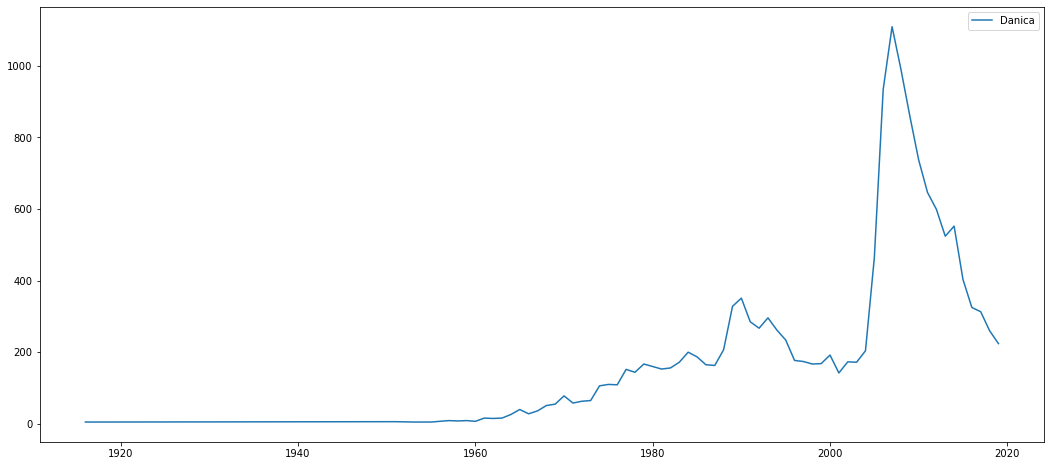

In [20]:


name_popl('F', name = 'Danica')